# The wind and solar potential of future charging stations

In [1]:
import pandas as pd

# Load China PV coverage data
china_pv = pd.read_csv('China_city_avg_PV_matching_level_with_count_city_based_filtered22.csv')
china_pv.rename(columns={'name_right': 'City', 'avg_PV_matching_level': 'avg_PV_matching_level', 'charging_station_count': 'charging_station_count', 'avg_PV_value': 'avg_PV_value'}, inplace=True)
china_pv['Region'] = 'China'

# Load China wind energy coverage data
china_wind = pd.read_csv('China_city_avg_wind_matching_level_with_count_city_based_filtered22.csv')
china_wind.rename(columns={'name_right': 'City', 'avg_wind_matching_level': 'avg_wind_matching_level', 'charging_station_count': 'charging_station_count', 'avg_power_density': 'avg_power_density'}, inplace=True)

# Merge China's data
china_data = pd.merge(china_pv, china_wind[['City', 'avg_wind_matching_level', 'avg_power_density']], on='City', how='left')

# Load EU PV coverage data
eu_pv = pd.read_csv('EU_city_avg_PV_matching_level_with_count_city_based_filtered22.csv')
eu_pv.rename(columns={'NUTS_NAME_right': 'City', 'avg_PV_matching_level': 'avg_PV_matching_level', 'charging_station_count': 'charging_station_count', 'avg_PV_value': 'avg_PV_value'}, inplace=True)
eu_pv['Region'] = 'Europe'

# Load EU wind energy coverage data
eu_wind = pd.read_csv('EU_city_avg_wind_matching_level_with_count_city_based_filtered22.csv')
eu_wind.rename(columns={'NUTS_NAME_right': 'City', 'avg_wind_matching_level': 'avg_wind_matching_level', 'charging_station_count': 'charging_station_count', 'avg_power_density': 'avg_power_density'}, inplace=True)

# Merge EU's data
eu_data = pd.merge(eu_pv, eu_wind[['City', 'avg_wind_matching_level', 'avg_power_density']], on='City', how='left')

# Load USA PV coverage data
usa_pv = pd.read_csv('USA_city_avg_PV_matching_level_with_count_city_based_filtered22.csv')
usa_pv.rename(columns={'COUNTYNS': 'City', 'avg_PV_matching_level': 'avg_PV_matching_level', 'charging_station_count': 'charging_station_count_usa_pv', 'avg_PV_value': 'avg_PV_value'}, inplace=True)
usa_pv['Region'] = 'USA'

# Load USA wind energy coverage data
usa_wind = pd.read_csv('USA_city_avg_wind_matching_level_with_count_city_based_filtered22.csv')
usa_wind.rename(columns={'COUNTYNS': 'City', 'avg_wind_matching_level': 'avg_wind_matching_level', 'charging_station_count': 'charging_station_count', 'avg_power_density': 'avg_power_density'}, inplace=True)

# Merge USA's data ensuring consistency in charging station count column name
usa_data = pd.merge(usa_pv, usa_wind[['City', 'avg_wind_matching_level', 'avg_power_density', 'charging_station_count']], on='City', how='left')

# Ensure both columns exist, select the larger value as the final charging station count
usa_data['charging_station_count'] = usa_data[['charging_station_count_usa_pv', 'charging_station_count']].max(axis=1)
usa_data.drop(['charging_station_count_usa_pv'], axis=1, inplace=True)

# Concatenate EU and USA data
final_data = pd.concat([eu_data, usa_data, china_data], ignore_index=True)

# Select the final desired columns
final_data = final_data[['City', 'avg_PV_matching_level', 'charging_station_count', 'avg_PV_value', 'avg_wind_matching_level', 'avg_power_density', 'Region']]

# Display the first few rows of the merged dataset
print(final_data.head())

# If needed to save as a CSV file
final_data.to_csv('EUUSAChinamerged_data_gaode.csv', index=False)

                              City  avg_PV_matching_level  \
0                           Aargau               0.838402   
1  Aberdeen City and Aberdeenshire               0.729551   
2                       Achterhoek               0.687968   
3                            Agder               0.861042   
4             Agglomeratie Haarlem               0.434527   

   charging_station_count  avg_PV_value  avg_wind_matching_level  \
0                  3502.0      3.349530                 0.172921   
1                  2312.0      2.446112                 0.193546   
2                  4207.0      2.884605                 0.208004   
3                   284.0      2.732940                 0.088615   
4                   532.0      2.981637                 0.088521   

   avg_power_density  Region  
0          27.683705  Europe  
1          98.942455  Europe  
2          60.029167  Europe  
3          59.491104  Europe  
4          61.265587  Europe  


# The data of the current charging stations have been consolidated

In [ ]:
import pandas as pd

# Read the original CSV file (please adjust the path as needed)
input_file = 'combined_city_PV_wind_matching_level_with_area22.csv'

# Attempt to read the file using default encoding (pandas uses utf-8 by default)
df = pd.read_csv(input_file)

# Rename the 'Area' column to 'Region'
df.rename(columns={'Area': 'Region'}, inplace=True)

# Replace 'EU' with 'Europe' in the Region column
df['Region'] = df['Region'].replace({'EU': 'Europe'})

# Display the first few rows to verify the changes
print(df.head())

# Export to a new CSV file using utf-8-sig encoding to prevent乱码 in Excel
output_file = 'combined_city_PV_wind_matching_level_with_area22_cleaned.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"\n✅ Data cleaning completed, saved to: {output_file}")

# Visual code for comparing the present and the future

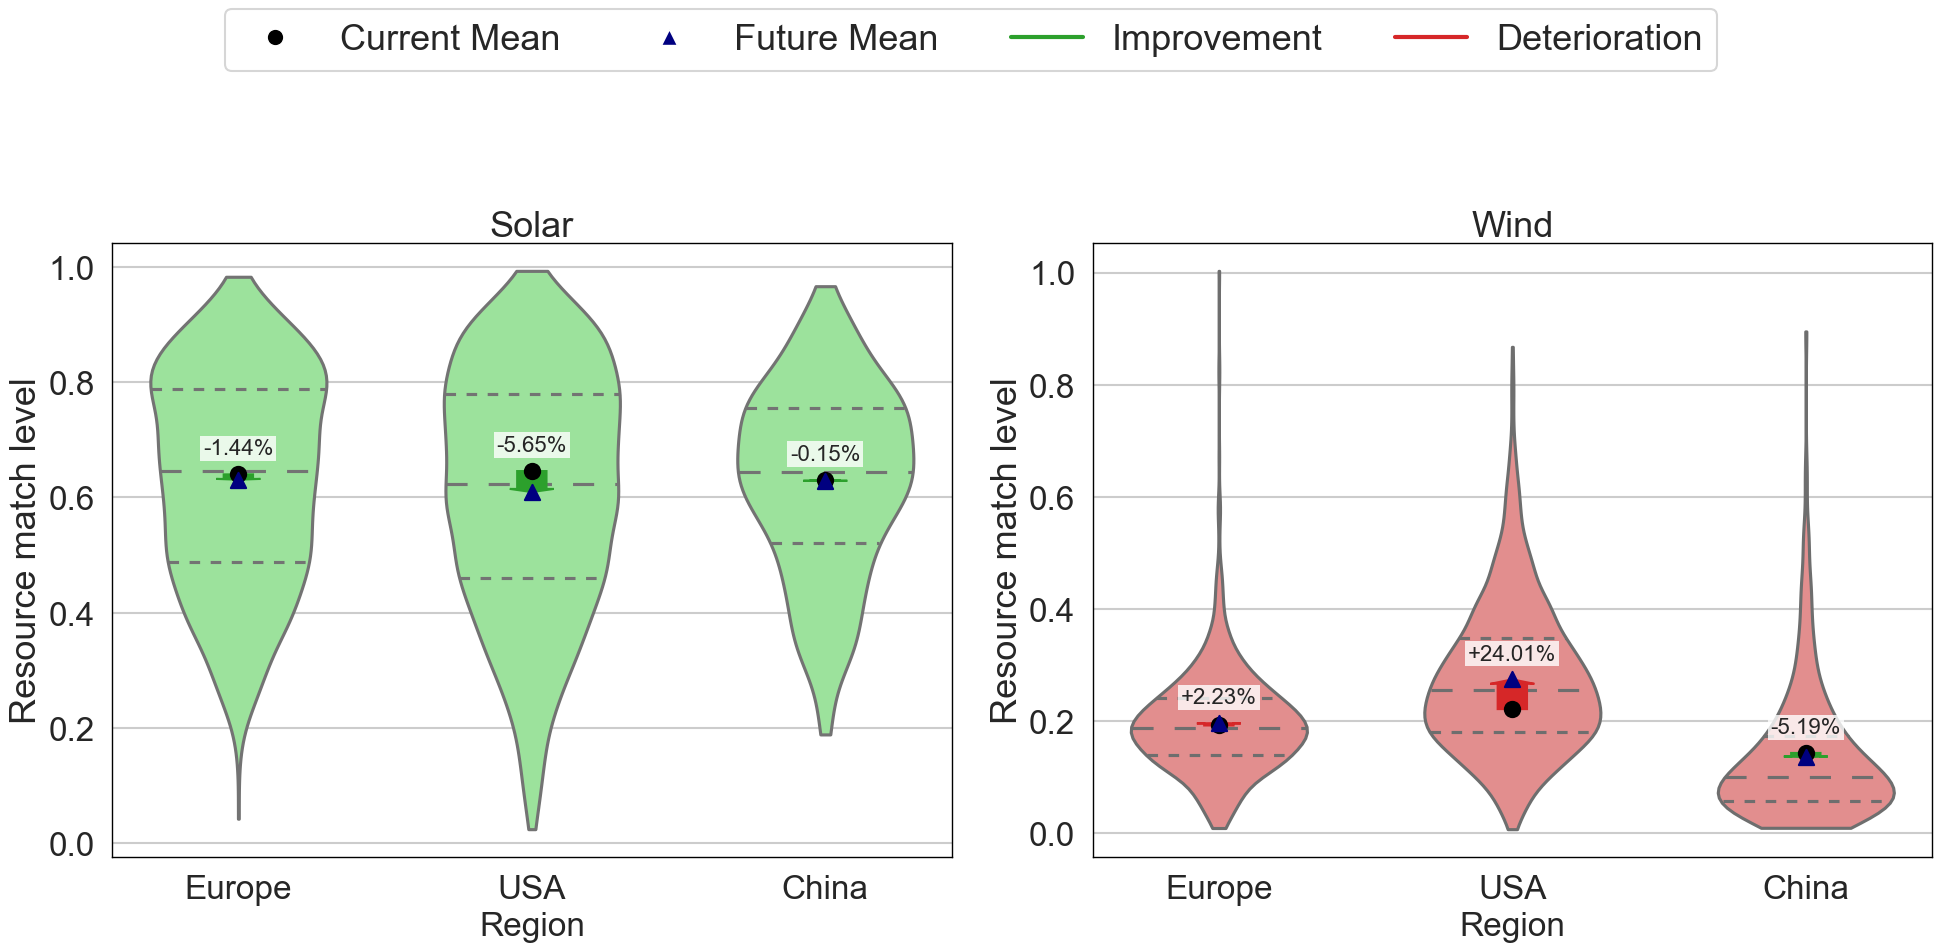


📊 风光适配度比较（Current vs Future）:

Solar Matching Level:
  Europe:
    Current Mean: 0.64
    Future Mean:  0.63
    % Change:     -1.44%

  USA:
    Current Mean: 0.65
    Future Mean:  0.61
    % Change:     -5.65%

  China:
    Current Mean: 0.63
    Future Mean:  0.63
    % Change:     -0.15%

Wind Matching Level:
  Europe:
    Current Mean: 0.19
    Future Mean:  0.20
    % Change:     +2.23%

  USA:
    Current Mean: 0.22
    Future Mean:  0.27
    % Change:     +24.01%

  China:
    Current Mean: 0.14
    Future Mean:  0.14
    % Change:     -5.19%



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set properties for axis spines (border lines)
def set_spine_properties(ax):
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)


# Custom CSV reader with UTF-8 fallback
def read_csv_utf8(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(file_path, encoding='latin1')


def main():
    # Define file paths
    current_file = 'combined_city_PV_wind_matching_level_with_area22_cleaned.csv'  # Current data file
    future_file = 'EUUSAChinamerged_data0531.csv'  # Future data file

    # Read CSV files
    df_current = read_csv_utf8(current_file)
    df_future = read_csv_utf8(future_file)

    # Replace 'EU' with 'Europe' in the Region column
    for df in [df_current, df_future]:
        df['Region'] = df['Region'].replace({'EU': 'Europe'})

    regions = ['Europe', 'USA', 'China']

    # Compute mean values by region
    current_means = df_current.groupby('Region')[['avg_PV_matching_level', 'avg_wind_matching_level']].mean()
    future_means = df_future.groupby('Region')[['avg_PV_matching_level', 'avg_wind_matching_level']].mean()

    # Set Seaborn style and font size
    sns.set(style="whitegrid", context="talk")
    plt.rcParams.update({'font.size': 26})

    metrics = {
        'avg_PV_matching_level': {'title': 'Solar', 'color': 'lightgreen'},
        'avg_wind_matching_level': {'title': 'Wind', 'color': 'lightcoral'}
    }

    fig, axes = plt.subplots(1, 2, figsize=(20, 9))

    # Create violin plots for each metric with current vs future comparison
    for ax, (metric_key, metric_info) in zip(axes, metrics.items()):
        # Draw violin plot using future data
        sns.violinplot(
            x='Region',
            y=metric_key,
            data=df_future[df_future['Region'].isin(regions)],
            palette=[metric_info['color']],
            inner='quartile',
            scale='width',
            ax=ax,
            cut=0,
            width=0.6
        )

        # Set title and labels
        ax.set_title(metric_info['title'], fontsize=26, pad=5)
        ax.set_xlabel('Region', fontsize=24)
        ax.set_ylabel('Resource match level', fontsize=26)
        ax.tick_params(axis='both', labelsize=24)

        # Plot current and future mean values
        for i, region in enumerate(regions):
            current_val = current_means.loc[region, metric_key]
            future_val = future_means.loc[region, metric_key]
            delta = future_val - current_val

            # Calculate percentage change
            percent_change = ((future_val - current_val) / current_val * 100) if current_val != 0 else float('inf')

            # Current mean (circle marker)
            ax.scatter(
                i, current_val,
                color='black',
                marker='o',
                s=120,
                zorder=5,
                label='Current Mean' if region == 'Europe' else ''
            )

            # Future mean (triangle marker)
            ax.scatter(
                i, future_val,
                color='navy',
                marker='^',
                s=120,
                zorder=5,
                label='Future Mean' if region == 'Europe' else ''
            )

            # Draw arrow indicating change
            arrow_props = {
                'head_width': 0.15,
                'head_length': abs(delta) * 0.15,
                'length_includes_head': True,
                'zorder': 4
            }

            ax.arrow(
                i, current_val,
                0, delta,
                color='#2ca02c' if delta < 0 else '#d62728',
                width=0.1,
                **arrow_props
            )

            # Add percentage change label above the higher value
            label_y = max(current_val, future_val) + 0.02 * (1.2 + 0.2)
            ax.text(
                i, label_y,
                f'{percent_change:+.2f}%',  # Show percentage change
                ha='center', va='bottom',
                fontsize=16,
                bbox=dict(facecolor='white', alpha=0.8, pad=2, edgecolor='none')
            )

        # Apply custom spine styling
        set_spine_properties(ax)

    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Current Mean',
               markerfacecolor='black', markersize=12),
        Line2D([0], [0], marker='^', color='w', label='Future Mean',
               markerfacecolor='navy', markersize=12),
        Line2D([0], [0], color='#2ca02c', lw=3, label='Improvement'),
        Line2D([0], [0], color='#d62728', lw=3, label='Deterioration')
    ]

    # Add legend
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fontsize=26, frameon=True)

    # Adjust layout to accommodate legend and title
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

    # ================= Print average matching levels and percentage changes ===================

    print("\n📊 Comparison of Solar and Wind Matching Levels (Current vs Future):\n")

    metric_labels = {
        'avg_PV_matching_level': 'Solar Matching Level',
        'avg_wind_matching_level': 'Wind Matching Level'
    }

    for col_name, display_name in metric_labels.items():
        print(f"{display_name}:")
        for region in regions:
            current_avg = current_means.loc[region, col_name]
            future_avg = future_means.loc[region, col_name]
            percent_change = ((future_avg - current_avg) / current_avg * 100) if current_avg != 0 else float('inf')

            print(f"  {region}:")
            print(f"    Current Mean: {current_avg:.2f}")
            print(f"    Future Mean:  {future_avg:.2f}")
            print(f"    % Change:     {percent_change:+.2f}%\n")


# Execute main function
if __name__ == "__main__":
    main()
